The dataset contains 18 behavioral variables in a 6-month span. 
The goal is to segment the customers in different clusters in order to engage different ads or content and increase the efficiency of marketing campains.

The process we will follow is :

1. Data cleaning
2. EDA
3. Model Building ( clustering )
4. Performance evaluation

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [81]:
df=pd.read_csv(r"C:\Users\John\Documents\data science projects\Credit Card Dataset for Clustering\CC GENERAL.csv")

In [82]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [83]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


We will drop customer id since it serves no purpose.

In [84]:
df.drop('CUST_ID', axis = 1 , inplace = True)

Check for nulls

In [85]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Credit limit has 1 null and Minimum payments has 313.

We will drop the null in the creadit limit column but we will not drop the entries in Minimum payments , so as to avoid losing too much information.

In [86]:
df[df['CREDIT_LIMIT'].isnull()].index.tolist()

[5203]

In [87]:
df.drop(df[df['CREDIT_LIMIT'].isnull()].index.tolist() , axis = 0 , inplace = True)

Reset the index since we deleted an entry

In [88]:
df.reset_index(drop=True, inplace=True)

For Minimum payments we will replace the nan with the zero value in customers who done no payments , i.e. where payments = 0 

In [89]:
zero_indices = np.where(df['PAYMENTS'] ==0)

In [90]:
for index in zero_indices:
     df['MINIMUM_PAYMENTS'][index] =0



<ipython-input-90-829ca01a9584>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MINIMUM_PAYMENTS'][index] =0


If the 0 < payments < payments mean,  then we will replace the minimum payments value with the payments, otherwise we will use the mean payment as the minimum payment value

In [91]:
index_values = np.where(df['PAYMENTS']<df['PAYMENTS'].mean())

In [92]:
for index in index_values:
     df['MINIMUM_PAYMENTS'][index] = df['PAYMENTS'][index]

<ipython-input-92-6135cafd2391>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MINIMUM_PAYMENTS'][index] = df['PAYMENTS'][index]


In [93]:
mean = df['PAYMENTS'].mean()

df['MINIMUM_PAYMENTS'] = np.where(df['MINIMUM_PAYMENTS'] > mean , mean ,df['MINIMUM_PAYMENTS'] )

Outlier detection

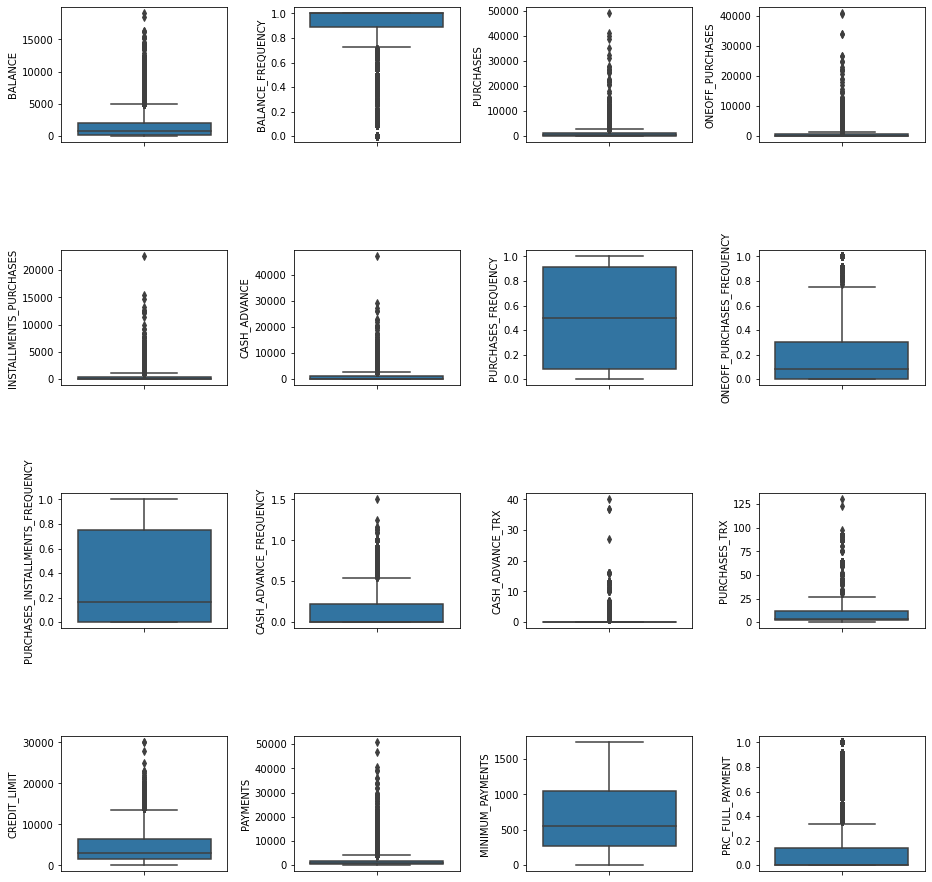

In [107]:
plt.subplots(nrows=4 , ncols=4 , figsize=(15,15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i in range(len(df.columns)-1):
    
    plt.subplot(4,4,i+1)
    sns.boxplot(data = df[df.columns[i]] , y =df[df.columns[i]] )
    

Clearly the data contains many outliers. 
We will use the IQR method to count them.

In [95]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [96]:
outliers = df[(df <  (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].count()


outliers = pd.DataFrame(outliers, columns=['number of outliers'])
outliers

,number of outliers
BALANCE,695
BALANCE_FREQUENCY,1492
PURCHASES,808
ONEOFF_PURCHASES,1013
INSTALLMENTS_PURCHASES,867
CASH_ADVANCE,1030
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,782
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,525


We will manually cap some values.
- Balance will be capped at 15.000
- Purchases at 40.000
- One off purcheses at 30.000
- installments purchases at 20.000
- cash advance at 40.000
- minimum payments at 60.000

In [108]:
df = df[(df['BALANCE']<15000)]
df = df[(df['PURCHASES']<40000)]
df = df[(df['ONEOFF_PURCHASES']<30000)]
df = df[(df['INSTALLMENTS_PURCHASES']<20000)]
df = df[(df['CASH_ADVANCE']<40000)]
df = df[(df['MINIMUM_PAYMENTS']<60000)]

In [110]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace = True)


EDA

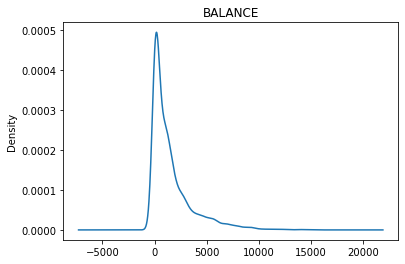

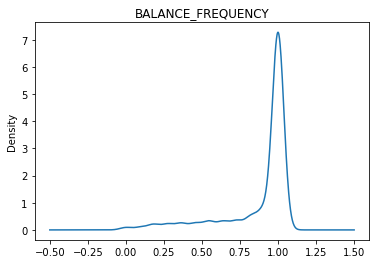

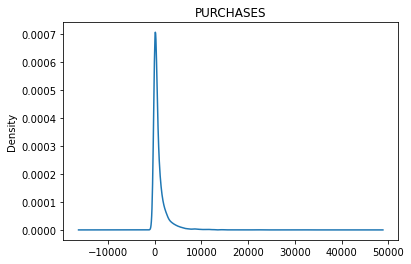

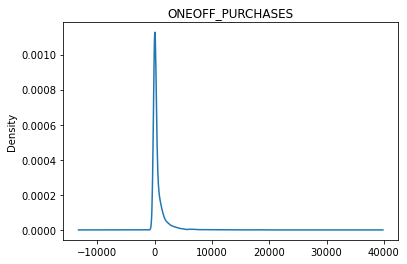

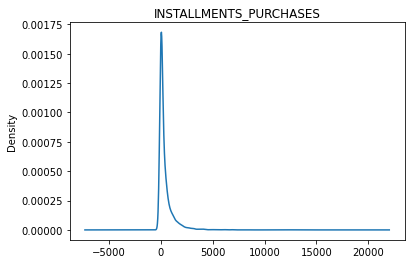

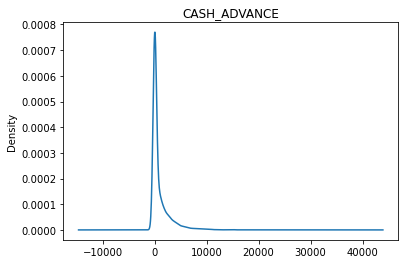

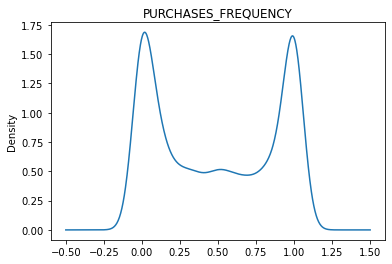

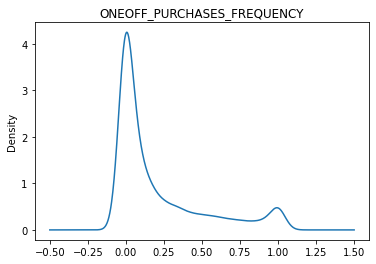

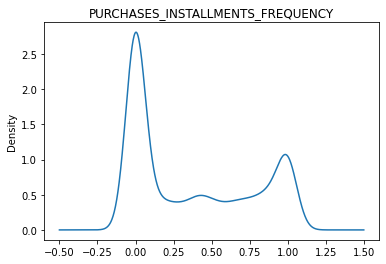

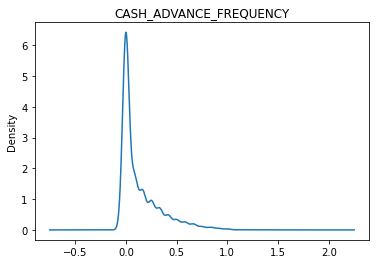

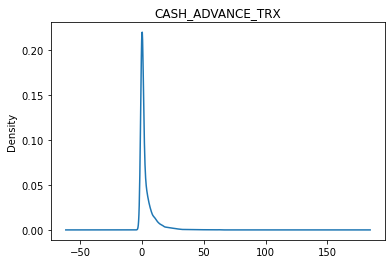

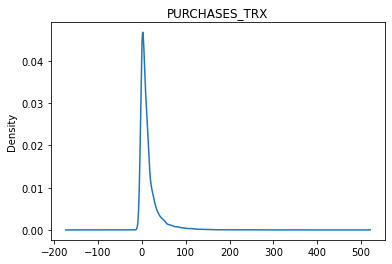

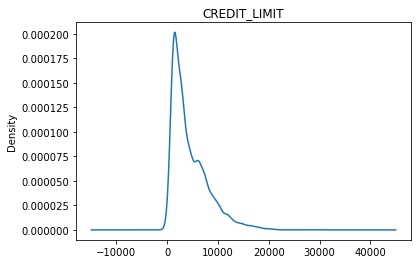

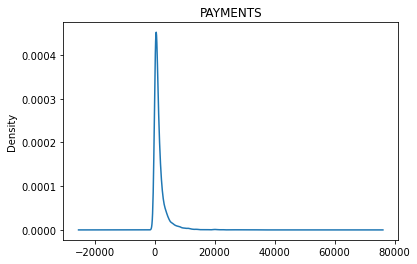

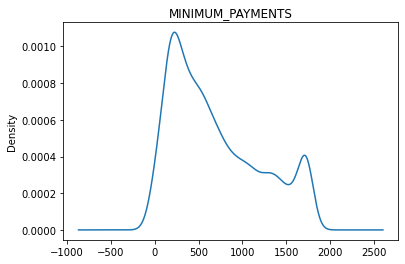

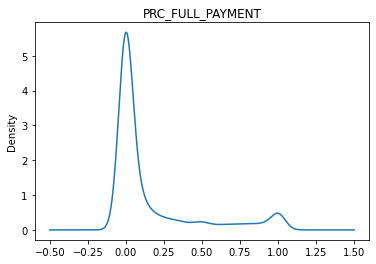

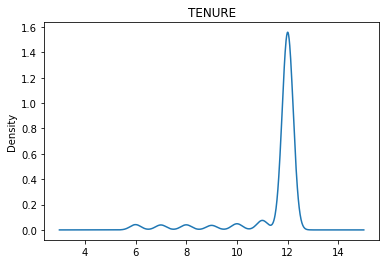

In [120]:
for column in df.columns:
    df[column].plot.kde()
    plt.title(column)
    plt.show()

Lets take a look at the data correlations

<AxesSubplot:>

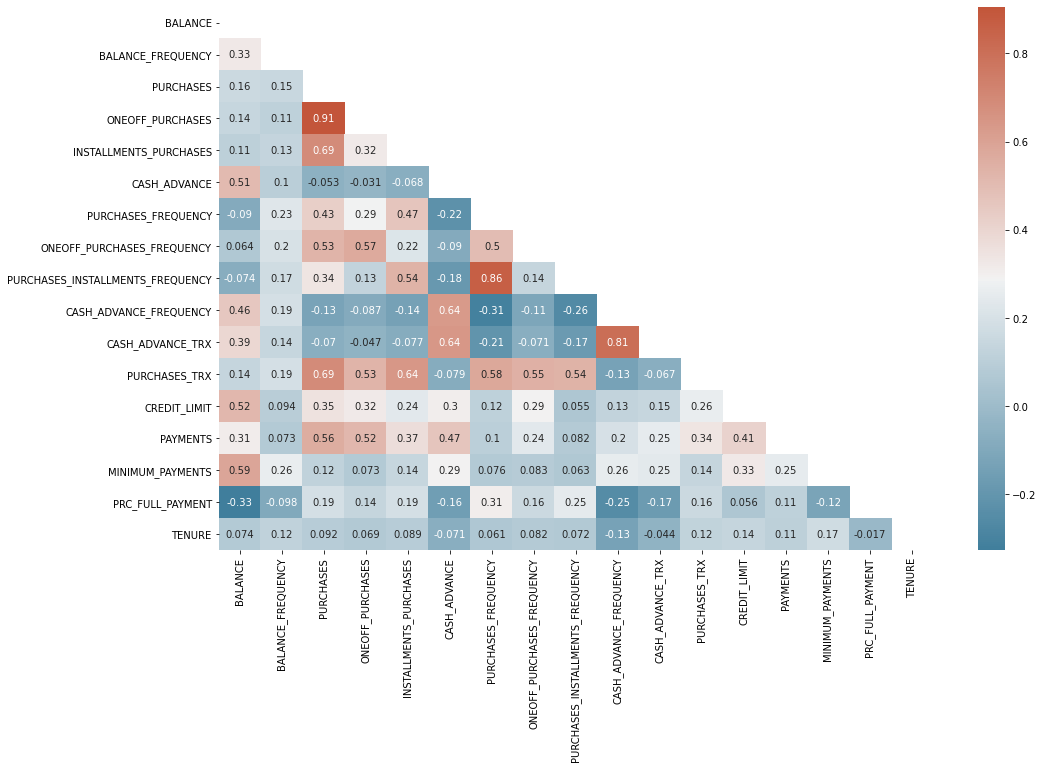

In [123]:
corr = df.corr()

f, ax = plt.subplots(figsize=(16, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Modelling

We start by stardardizing the data (center the data around the mean and scale to a standard deviation equal to 1)

In [125]:
model = df.copy(deep = True)

In [127]:
scaler= StandardScaler()
df_standardized=pd.DataFrame(scaler.fit_transform(model), columns = model.columns)
df_standardized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.745500,-0.253142,-0.465767,-0.396806,-0.365535,-0.477131,-0.805851,-0.677992,-0.706804,-0.675960,-0.482399,-0.521155,-0.966170,-0.550720,-0.957314,-0.525889,0.360625
1,0.819765,0.132373,-0.516293,-0.396806,-0.478510,2.681741,-1.221166,-0.677992,-0.916566,0.575761,0.113856,-0.604188,0.704641,0.886325,0.747107,0.233957,0.360625
2,0.469578,0.517887,-0.106806,0.140432,-0.478510,-0.477131,1.270715,2.680629,-0.916566,-0.675960,-0.482399,-0.105993,0.843876,-0.395913,-0.134481,-0.525889,0.360625
3,0.059405,-1.024171,0.277608,0.644776,-0.478510,-0.376236,-1.013510,-0.398108,-0.916566,-0.258721,-0.333335,-0.562671,0.843876,-0.625055,-1.352421,-0.525889,0.360625
4,-0.360906,0.517887,-0.507819,-0.385689,-0.478510,-0.477131,-1.013510,-0.398108,-0.916566,-0.675960,-0.482399,-0.562671,-0.910476,-0.375186,-0.024314,-0.525889,0.360625


We will apply kmeans to cluster the data

In [133]:
silhouette = []
inertia_scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_standardized)
    inertia_scores.append(kmeans.inertia_)
    S_score = silhouette_score(df_standardized, kmeans.labels_)
    silhouette.append(S_score)

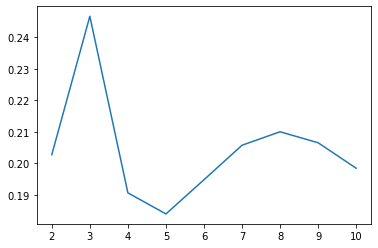

In [134]:
plt.plot(range(2,11), silhouette)


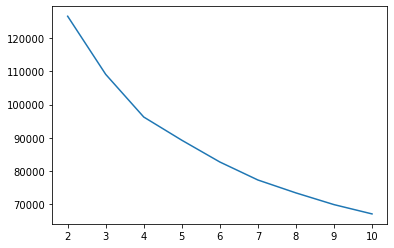

In [136]:
plt.plot(range(2,11) , inertia_scores)

According to the silhouette score the optimal number of clusters is 3 , and according to the elbow method the optimal number is 3-4 . We choose 3 clusters. 

In [137]:
clustering = KMeans(n_clusters= 3)
clustering.fit(df_standardized)
df_standardized['cluster labels'] = clustering.labels_

In [157]:
data_for_plot = pd.DataFrame(df_standardized['cluster labels'].value_counts()).sort_index()

In [158]:
data_for_plot['Cluster labels']=[0,1,2]

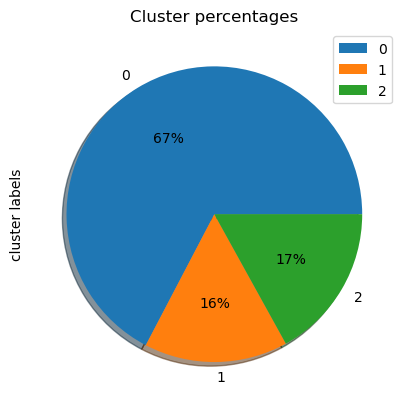

In [176]:
data_for_plot.plot(kind = 'pie', y = 'cluster labels', autopct ='%1.0f%%' , shadow=True , legend = True , title='Cluster percentages')

plt.show()

We will perform PCA in order to reduce the data dimesnions down to 2 and then visualize it.

In [180]:
from sklearn.decomposition import PCA

In [183]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(df_standardized)

#2D
pca_data = pd.DataFrame(data = pca_data, columns = ['pca1', 'pca2'])
pca_data.head()

,pca1,pca2
0,-2.012892,-1.077591
1,-0.558234,3.172254
2,0.872353,-0.625753
3,-1.100020,-0.335692
4,-1.746717,-0.487056


In [185]:
pca_data['cluster labels'] = df_standardized['cluster labels']

In [186]:
pca_data.head()

,pca1,pca2,cluster labels
0,-2.012892,-1.077591,0
1,-0.558234,3.172254,2
2,0.872353,-0.625753,0
3,-1.100020,-0.335692,0
4,-1.746717,-0.487056,0


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

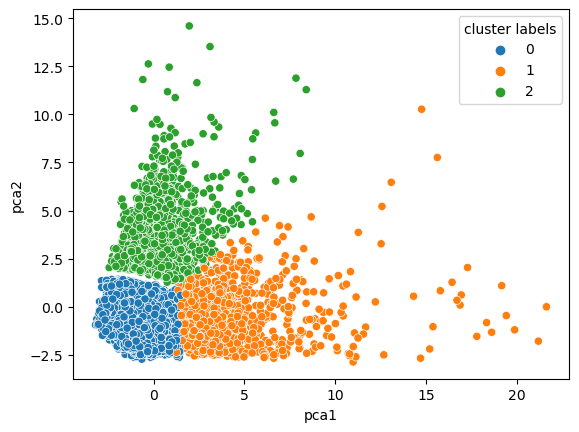

In [188]:
sns.scatterplot(data = pca_data , x = 'pca1' , y= 'pca2' , hue = 'cluster labels' , palette = 'tab10')

Data is well separated and the clusters are well defined

Export the results to csv for further analysis/reporting

In [ ]:
df.to_csv('Customer segmentation of credit card dataset.csv')